In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.math import confusion_matrix
import seaborn as sns
tf.random.set_seed(3)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


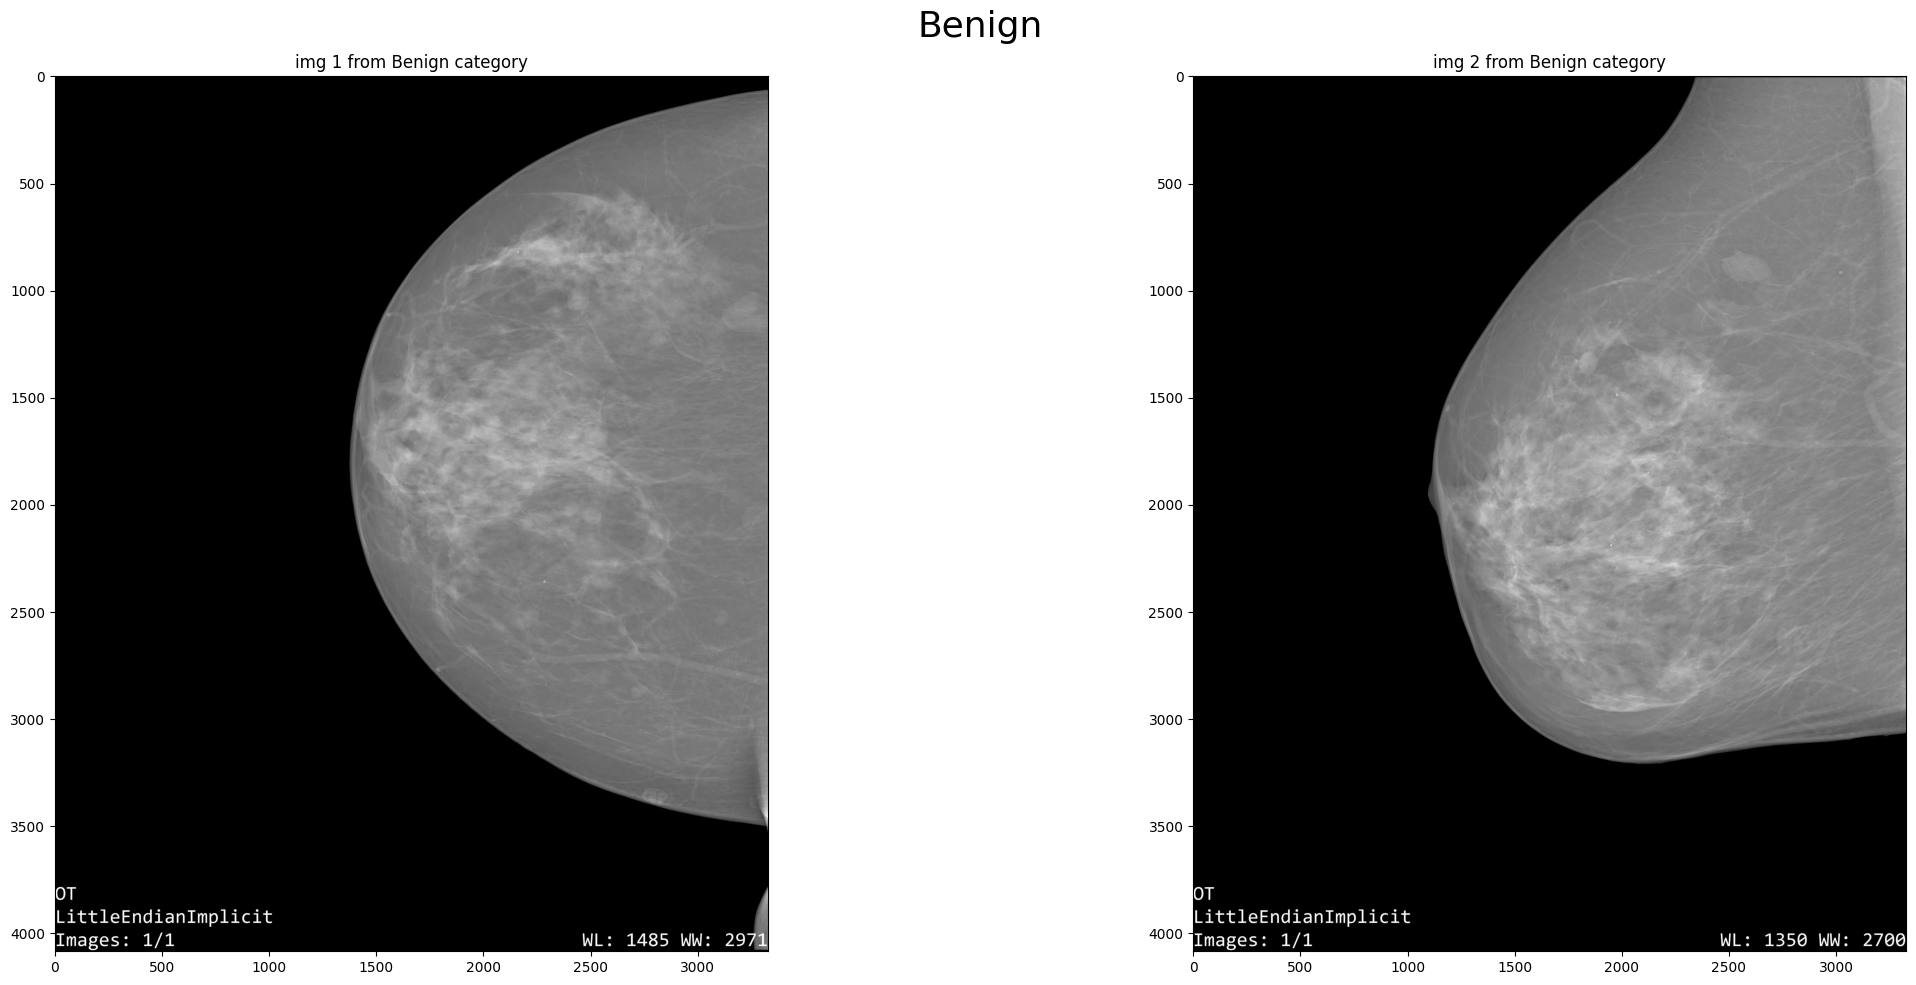

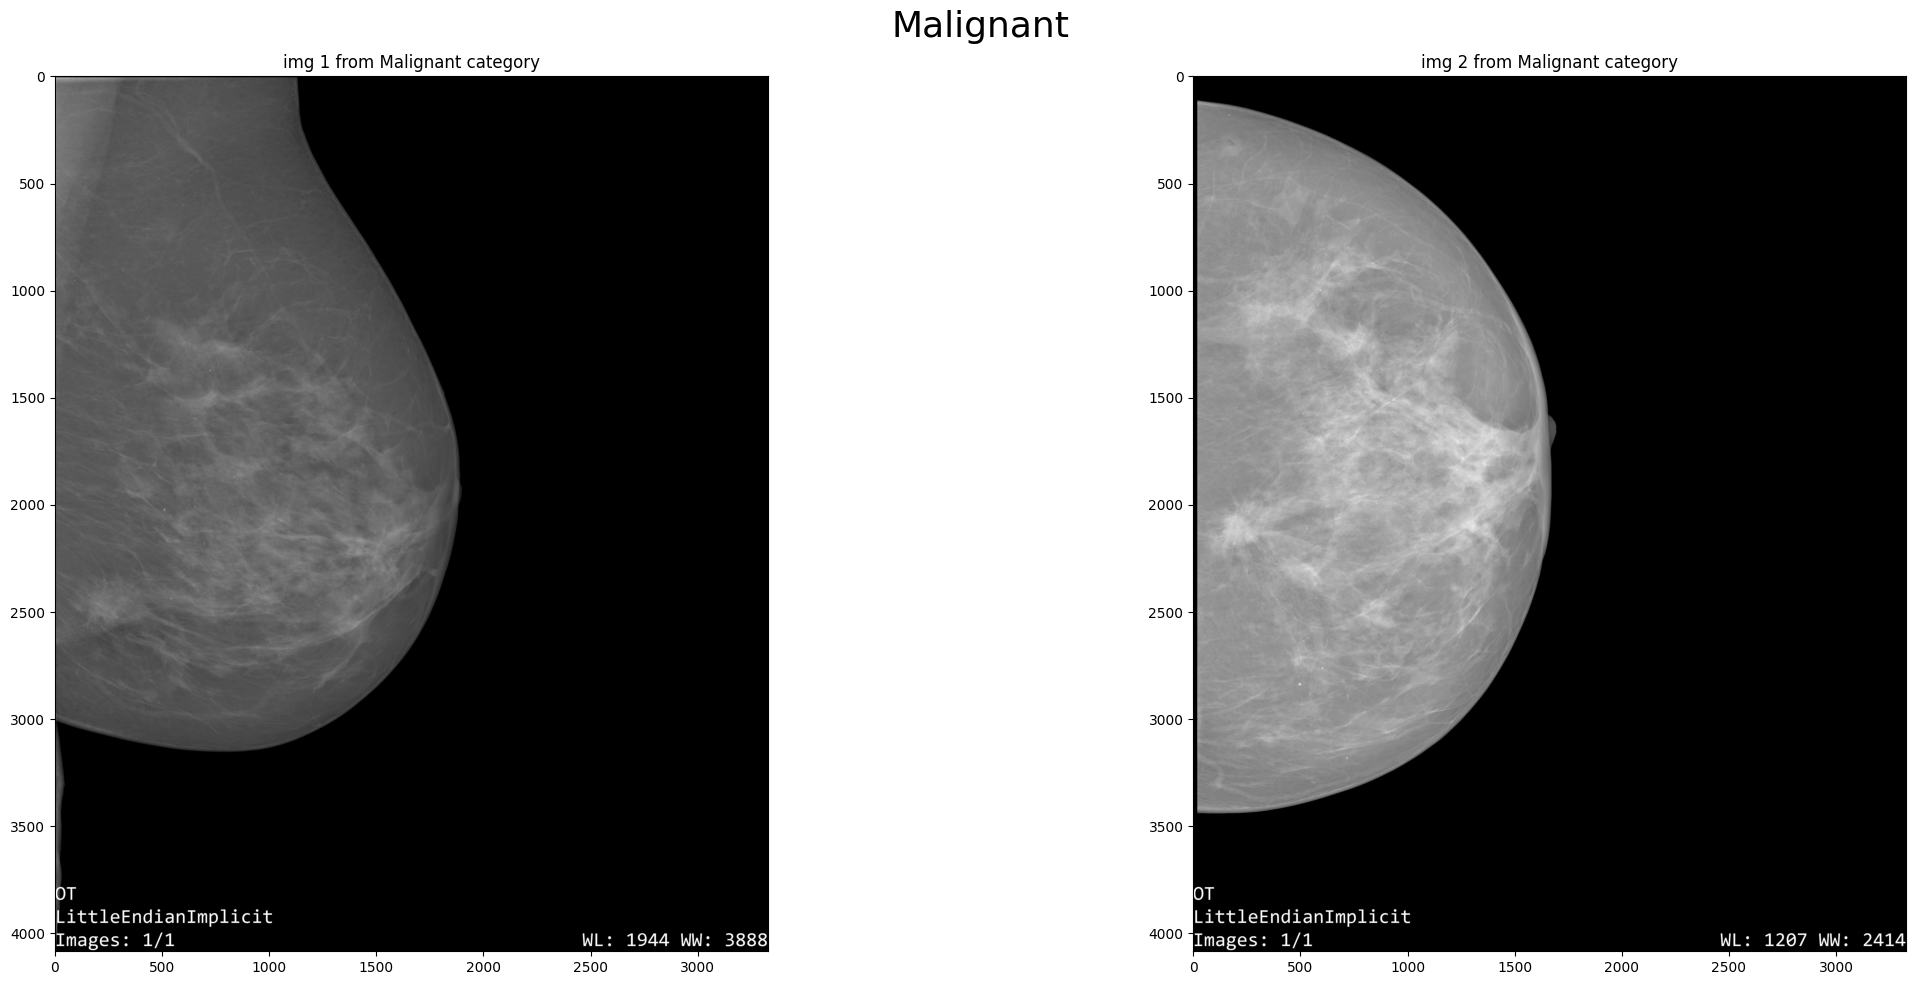

In [ ]:
folder_name = '/content/drive/MyDrive/ModelLab/InbreastDataset'
files_names = ['Benign', 'Malignant']

for file in files_names:
    path = os.path.join(folder_name, file)
    x = 0
    fig, axes = plt.subplots(1,2, figsize=(25, 10))
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        axes[x].imshow(img_array, cmap='gray')
        axes[x].set_title(f"img {x+1} from {file} category")
        x += 1
        if x == 2:
            break

    plt.suptitle(file, fontsize=26)
    plt.tight_layout()
    plt.show()


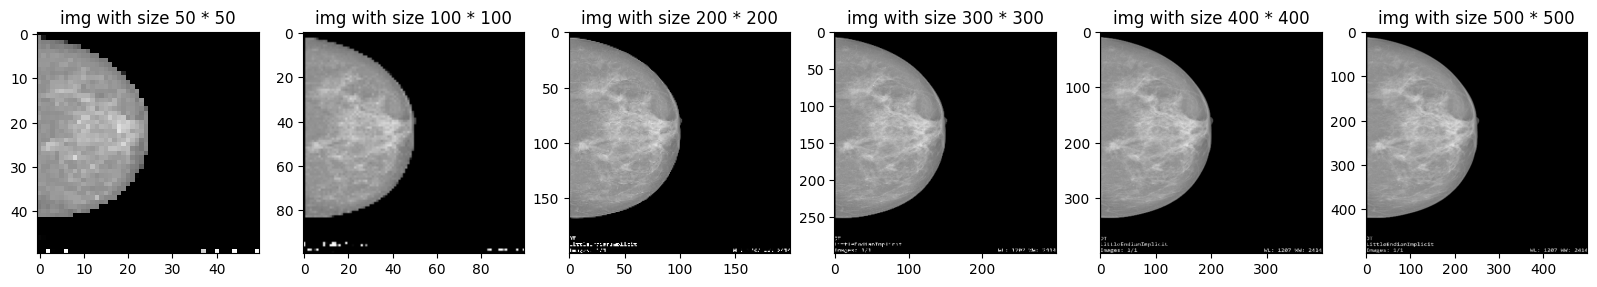

In [ ]:
img_sz = [50, 100, 200, 300, 400, 500]
plt.figure(figsize=(20, 5))

for i, sz in enumerate(img_sz):
    new_array = cv2.resize(img_array, (sz, sz))
    plt.subplot(1, len(img_sz), i+1)
    plt.imshow(new_array, cmap='gray')
    plt.title(f"img with size {sz} * {sz}")

plt.show()


In [ ]:
#size (300*300) is okay
img_sz=300

In [ ]:
training_data = []

def create_training_data():
    for file in files_names:
        path = os.path.join(folder_name, file)
        class_num = files_names.index(file)
        print(file,class_num)

        for img in tqdm(os.listdir(path)):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (img_sz, img_sz))  # Include resizing
            training_data.append([new_array, class_num])

create_training_data()


Benign 0


100%|██████████| 37/37 [00:01<00:00, 25.25it/s]


Malignant 1


100%|██████████| 71/71 [00:02<00:00, 24.99it/s]


In [ ]:
for i in range(5):
    print("Class number for image", i+1, ":", training_data[i][1])

Class number for image 1 : 0
Class number for image 2 : 0
Class number for image 3 : 0
Class number for image 4 : 0
Class number for image 5 : 0


In [ ]:
for i in range(-1, -6, -1):
    print("Class number for image", len(training_data) + i + 1, ":", training_data[i][1])


Class number for image 108 : 1
Class number for image 107 : 1
Class number for image 106 : 1
Class number for image 105 : 1
Class number for image 104 : 1


In [ ]:
random.shuffle(training_data)

for i in range(30):
    print(f"Sample {i+1}:")
    print("Class number:", training_data[i][1],"\n")

Sample 1:
Class number: 0 

Sample 2:
Class number: 1 

Sample 3:
Class number: 0 

Sample 4:
Class number: 1 

Sample 5:
Class number: 1 

Sample 6:
Class number: 0 

Sample 7:
Class number: 1 

Sample 8:
Class number: 1 

Sample 9:
Class number: 1 

Sample 10:
Class number: 0 

Sample 11:
Class number: 1 

Sample 12:
Class number: 0 

Sample 13:
Class number: 1 

Sample 14:
Class number: 0 

Sample 15:
Class number: 0 

Sample 16:
Class number: 1 

Sample 17:
Class number: 1 

Sample 18:
Class number: 1 

Sample 19:
Class number: 1 

Sample 20:
Class number: 0 

Sample 21:
Class number: 0 

Sample 22:
Class number: 0 

Sample 23:
Class number: 1 

Sample 24:
Class number: 0 

Sample 25:
Class number: 0 

Sample 26:
Class number: 0 

Sample 27:
Class number: 1 

Sample 28:
Class number: 1 

Sample 29:
Class number: 1 

Sample 30:
Class number: 1 



In [ ]:
X=[]
y=[]

for feature,label in training_data:
    X.append(feature)
    y.append(label)


X=np.array(X)
y=np.array(y)

In [ ]:
X=np.array(X)
y=np.array(y)
print(X.shape)
print(y.shape)

(108, 300, 300)
(108,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(86, 300, 300)
(86,)
(22, 300, 300)
(22,)


In [ ]:
print(np.unique(y_train))

print(np.unique(y_test))

[0 1]
[0 1]


In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
print(X_train[0])

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.00392157 0.         0.98823529 ... 0.00392157 0.9254902  0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


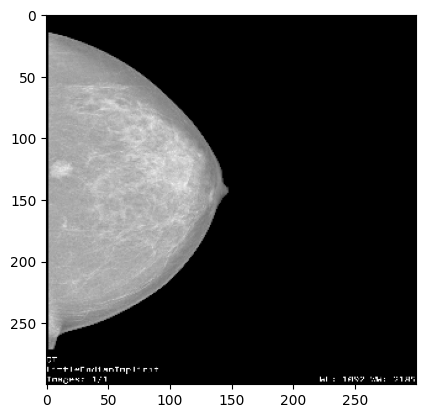

In [ ]:
plt.imshow(X_train[0],cmap='gray')
plt.show()

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(img_sz,img_sz)),
                          keras.layers.Dense(256, activation='relu'),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dense(32, activation='relu'),
                          keras.layers.Dense(16, activation='relu'),
                          keras.layers.Dense(8, activation='relu'),
                          keras.layers.Dense(3, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, y_train, epochs=50,validation_split=0.1)

Epoch 1/50
3/3 [==============================] - 3s 483ms/step - loss: 1.7518 - accuracy: 0.1558 - val_loss: 1.8865 - val_accuracy: 0.2222
Epoch 2/50
3/3 [==============================] - 2s 659ms/step - loss: 1.5015 - accuracy: 0.4545 - val_loss: 1.7813 - val_accuracy: 0.5556
Epoch 3/50
3/3 [==============================] - 2s 615ms/step - loss: 1.2544 - accuracy: 0.5455 - val_loss: 1.1800 - val_accuracy: 0.5556
Epoch 4/50
3/3 [==============================] - 1s 421ms/step - loss: 1.0201 - accuracy: 0.6364 - val_loss: 0.7564 - val_accuracy: 0.5556
Epoch 5/50
3/3 [==============================] - 1s 389ms/step - loss: 0.7375 - accuracy: 0.6623 - val_loss: 0.7859 - val_accuracy: 0.5556
Epoch 6/50
3/3 [==============================] - 1s 397ms/step - loss: 0.7614 - accuracy: 0.6494 - val_loss: 0.8338 - val_accuracy: 0.5556
Epoch 7/50
3/3 [==============================] - 1s 394ms/step - loss: 0.7332 - accuracy: 0.7013 - val_loss: 0.9346 - val_accuracy: 0.5556
Epoch 8/50
3/3 [====

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 90000)             0         
                                                                 
 dense_50 (Dense)            (None, 256)               23040256  
                                                                 
 dense_51 (Dense)            (None, 128)               32896     
                                                                 
 dense_52 (Dense)            (None, 64)                8256      
                                                                 
 dense_53 (Dense)            (None, 32)                2080      
                                                                 
 dense_54 (Dense)            (None, 16)                528       
                                                                 
 dense_55 (Dense)            (None, 8)               

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuarcy of the model is : {accuracy*100:.2f} %")

1/1 [==============================] - 0s 54ms/step - loss: 1.0423 - accuracy: 0.5909
Accuarcy of the model is : 59.09 %


In [ ]:
y_pred=model.predict(X_test)
print(y_pred[0])

1/1 [==============================] - 0s 111ms/step
[0.24016005 0.57803804 0.08357827]


In [ ]:
y_pred = [np.argmax(i) for i in y_pred]
print(y_pred)

[1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1]


In [ ]:
comparison_df = pd.DataFrame({ 'Actual': y_test,'Predicted': y_pred})

print(comparison_df[:20])

    Actual  Predicted
0        1          1
1        1          1
2        1          0
3        1          0
4        1          0
5        1          1
6        1          0
7        1          1
8        1          1
9        0          1
10       1          1
11       1          1
12       0          2
13       1          1
14       1          1
15       0          0
16       1          0
17       0          1
18       1          1
19       0          1


In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

tf.Tensor(
[[ 1  3  1]
 [ 5 12  0]
 [ 0  0  0]], shape=(3, 3), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

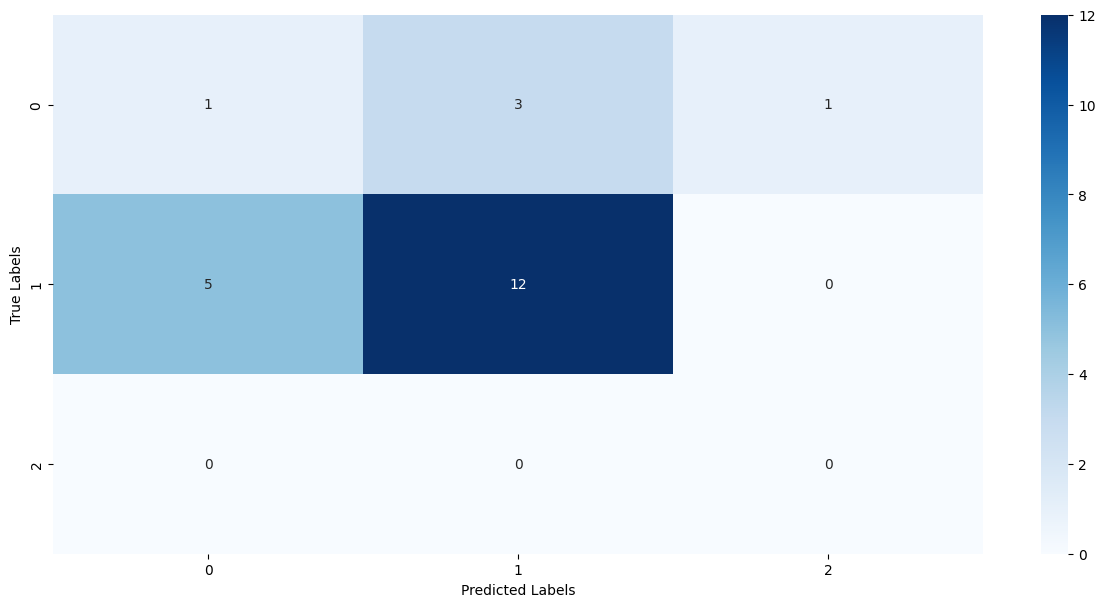

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.17      0.20      0.18         5
           1       0.80      0.71      0.75        17
           2       0.00      0.00      0.00         0

    accuracy                           0.59        22
   macro avg       0.32      0.30      0.31        22
weighted avg       0.66      0.59      0.62        22



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Reshape the data to 4D format expected by Keras
X = np.array([sample[0] for sample in training_data]).reshape(-1, img_sz, img_sz, 1)
y = np.array([sample[1] for sample in training_data])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the CNN model for feature extraction
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_sz, img_sz, 1)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(64, activation='relu'))

# Extract features using the CNN model
X_train_features = cnn_model.predict(X_train)
X_test_features = cnn_model.predict(X_test)

# Create the SVM model and train it on the extracted features
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train_features, y_train)

# Evaluate the SVM model on the test set
y_pred = svm_model.predict(X_test_features)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM model: {accuracy*100:.2f}%")

# Print the classification report
print(classification_report(y_test, y_pred))

1/1 [==============================] - 1s 939ms/step
Accuracy of the SVM model: 77.27%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.77      1.00      0.87        17

    accuracy                           0.77        22
   macro avg       0.39      0.50      0.44        22
weighted avg       0.60      0.77      0.67        22



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

In [ ]:
import cv2
from skimage.feature import hog
from skimage import exposure
import os

In [ ]:
benign_path = '/content/drive/MyDrive/ModelLab/InbreastDataset/Benign'
malignant_path = '/content/drive/MyDrive/ModelLab/InbreastDataset/Malignant'

In [ ]:
def extract_hog_features(image_path):
  # Load image in grayscale mode
  image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
  # Confirm that image is in grayscale
  if image is None or len(image.shape) != 2:
    raise ValueError("Image couldn't be loaded correctly, or isn't in grayscale as expected.")

  # Resize images to a consistent size
  resized_img = cv2.resize(image, (128, 128))

  # Extract HOG features
  features, _ = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
  cells_per_block=(2, 2), visualize=True)
  return features

In [ ]:
# Load the dataset and extract features
X = [] # feature vectors
y = [] # labels

In [ ]:
# Load benign images
for image_filename in os.listdir(benign_path):
  features = extract_hog_features(os.path.join(benign_path, image_filename))
  X.append(features)
  y.append(0) # 0 for benign

In [ ]:
# Load malignant images
for image_filename in os.listdir(malignant_path):
  features = extract_hog_features(os.path.join(malignant_path, image_filename))
  X.append(features)
  y.append(1) # 1 for malignant

In [ ]:
# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.7272727272727273
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         8
           1       0.70      1.00      0.82        14

    accuracy                           0.73        22
   macro avg       0.85      0.62      0.61        22
weighted avg       0.81      0.73      0.67        22

